In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [4]:
f_path = 'C:/Users/seulki/ML/NLP/Chapter03'
data_set = utils.get_file(fname=f_path + 'imdb.tar.gz',
                          origin='http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
                          extract=True, cache_subdir ='datasets',
                          cache_dir=f_path)
#sub디렉토리를 만들어 압축을 푼다

84131840/84125825 [==============================] - 94s 1us/step


In [5]:
def directory_data(directory):
    data = {}#데이터를 저장할 빈 딕셔너리 만들기
    data['review']=[]#빈 리스트 생성
    for file_path in os.listdir(directory): #리스트를 만들어 하나하나씩 넘겨준다
        with open(os.path.join(directory, file_path),'r',encoding='utf-8') as file:
            data['review'].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [7]:
#실제 데이터를 만드는 함수
def data(directory):
    pos_df = directory_data(os.path.join(directory,'pos'))#긍정
    neg_df = directory_data(os.path.join(directory,'neg'))#부정
    pos_df['sentiment']=1
    neg_df['sentiment']=0
    
    return pd.concat([pos_df, neg_df])#위아래로 붙여짐

In [8]:
#학습용 데이터 프레임
train_df = data(os.path.join(f_path, 'datasets','aclImdb', 'train'))
test_df = data(os.path.join(f_path, 'datasets','aclImdb', 'test'))

In [9]:
print(train_df.head())

                                              review  sentiment
0  Bromwell High is a cartoon comedy. It ran at t...          1
1  Homelessness (or Houselessness as George Carli...          1
2  Brilliant over-acting by Lesley Ann Warren. Be...          1
3  This is easily the most underrated film inn th...          1
4  This is not the typical Mel Brooks film. It wa...          1


In [10]:
print(train_df.tail())

                                                  review  sentiment
12495  Towards the end of the movie, I felt it was to...          0
12496  This is the kind of movie that my enemies cont...          0
12497  I saw 'Descent' last night at the Stockholm Fi...          0
12498  Some films that you pick up for a pound turn o...          0
12499  This is one of the dumbest films, I've ever se...          0


In [12]:
reviews = list(train_df['review'])

In [13]:
print(reviews[:3])

['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!', 'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from

In [14]:
tokenized_reviews = [r.split() for r in reviews]

In [15]:
print(tokenized_reviews[0])

['Bromwell', 'High', 'is', 'a', 'cartoon', 'comedy.', 'It', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life,', 'such', 'as', '"Teachers".', 'My', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'Bromwell', "High's", 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', '"Teachers".', 'The', 'scramble', 'to', 'survive', 'financially,', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', "teachers'", 'pomp,', 'the', 'pettiness', 'of', 'the', 'whole', 'situation,', 'all', 'remind', 'me', 'of', 'the', 'schools', 'I', 'knew', 'and', 'their', 'students.', 'When', 'I', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school,', 'I', 'immediately', 'recalled', '.........', 'at', '..........', 'High.', 'A', 'classic', 'line:', 'INSPECTOR:', "I'm", 'here', 'to', 'sack', 'one', 'of', 'your', 't

In [17]:
review_len_by_token = [len(t) for t in tokenized_reviews]#하나씩 가져와 렝스를 리스트로 저장

In [18]:
print(review_len_by_token[0])

140


In [19]:
print(len(review_len_by_token))

25000


In [20]:
# 리뷰데이터에서 알바벳 하나하나 가 몇자로 이루어져있는지 알아보기(중간에 블랭크 주의)
review_len_by_eumjeol = [len(s.replace(' ','')) for s in reviews]

In [21]:
print(len(review_len_by_eumjeol))

25000


In [23]:
print(review_len_by_eumjeol[0])#667개의 음절이다

667


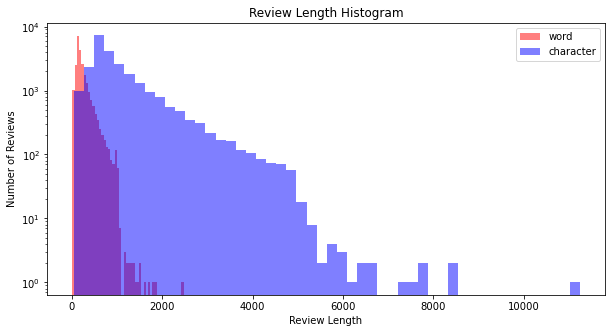

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log',nonpositive='clip')
plt.title('Review Length Histogram')
plt.legend(['word','character'])
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

In [26]:
#수치 통계
import numpy as np
print('문장 최대길이: {}'.format(np.max(review_len_by_token))) #문장에서 최대길이가 어떤것을 가지고있는지
print('문장 최소길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간 길이: {}'.format(np.median(review_len_by_token)))
print('문장 제1사분의 길이: {:.2f}'.format(np.percentile(review_len_by_token,25)))
print('문장 제3사분의 길이: {:.2f}'.format(np.percentile(review_len_by_token,75)))


문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간 길이: 174.0
문장 제1사분의 길이: 127.00
문장 제3사분의 길이: 284.00


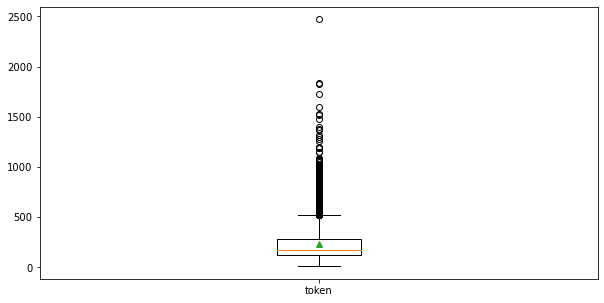

In [28]:
plt.figure(figsize=(10, 5))
plt.boxplot([review_len_by_token], labels=['token'], showmeans=True)
plt.show()
#평균값 녹색 삼각형
#박스 위의 원은 아웃라이어
#이상치가 많다(데이터가 많아) -> 학습효과가 떨어진다

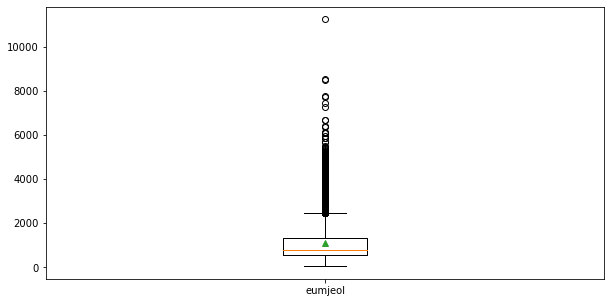

In [29]:
plt.figure(figsize=(10, 5))
plt.boxplot([review_len_by_eumjeol], labels=['eumjeol'], showmeans=True)
plt.show()

- conda install -c conda-forge wordcloud 설치

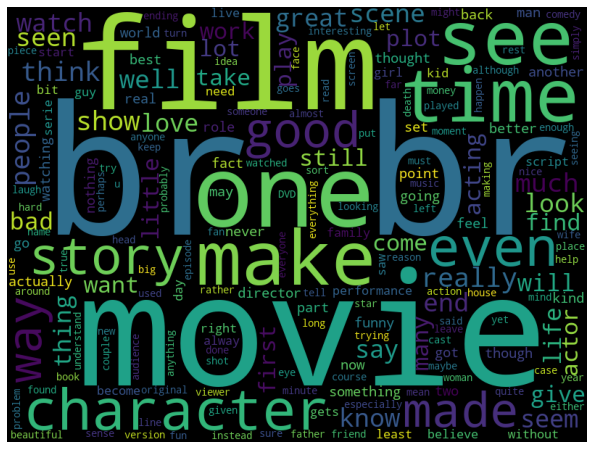

In [30]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=800, height=600).generate(' '.join(train_df['review']))
plt.figure(figsize=(13,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
                                                               

In [31]:
import seaborn as sns

In [32]:
sentiment = train_df['sentiment'].value_counts()
print(sentiment)

1    12500
0    12500
Name: sentiment, dtype: int64


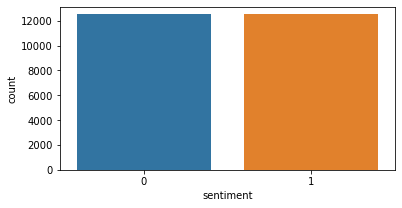

In [38]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(x=train_df['sentiment'])
plt.show()